<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/Imp_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [38]:
df=pd.read_csv('/content/ushape.csv')

In [39]:
df.head(5)

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [40]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

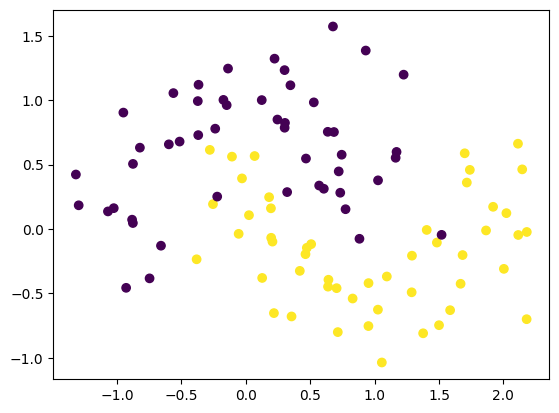

In [42]:
plt.scatter(X[:,0],X[:,1],c=y)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

<Axes: >

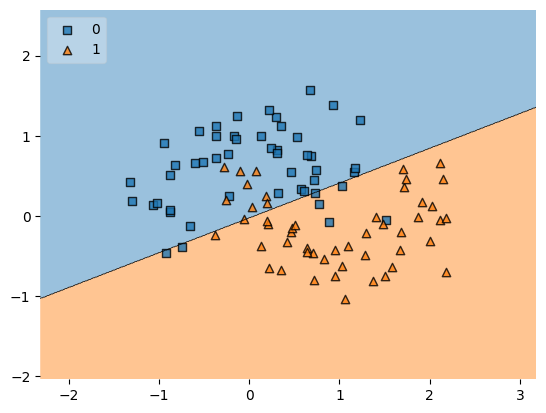

In [48]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=clf,legend=2)

In [49]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7

In [50]:
# apply polynomail
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(X)

In [51]:
clf1=LogisticRegression()
clf1.fit(X_poly,y)

LogisticRegression()

In [52]:
y_pred2=clf1.predict(X_poly)
accuracy_score(y,y_pred2)

0.9191919191919192

In [58]:
!pip install mlxtend


In [66]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [69]:
np.mean(cross_val_score(clf1,X_poly,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

In [70]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

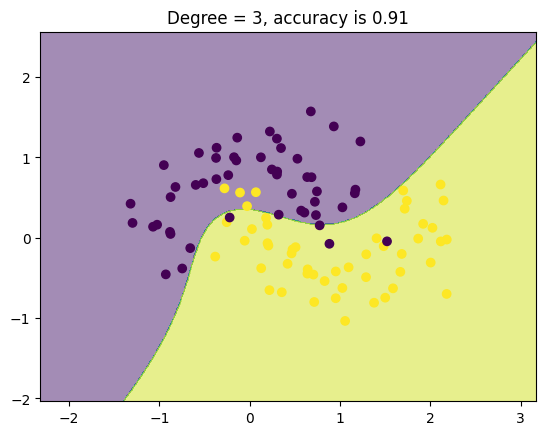

In [76]:

plot_decision_boundary(X,y,degree=3)